# Exercise 1: Logistic Regression

## Parts 1 and 2

In [1]:
# Import libraries
from sklearn.datasets import fetch_openml
import numpy as np

# Load the dataset
data = fetch_openml('mnist_784')

C:\Users\Calvin Tran\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [45]:
import sklearn.model_selection
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Split data
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    data['data'], data['target'], test_size=0.142857142, shuffle=False,
)

# Only use first two classes of training data
Y_train = Y_train.astype(int)
filter = np.isin(Y_train, [0, 1])
X_train = X_train[filter]
Y_train = Y_train[filter]
Y_train = np.flip(Y_train.to_list())

# Only use first two classes of test data
Y_test = Y_test.astype(int)
filter = np.isin(Y_test, [0, 1])
X_test = X_test[filter]
Y_test = Y_test[filter]
Y_test = np.flip(Y_test.to_list())

# Convert 784x1 vectors into 2x1 vectors
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Standardize input
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



Tolerance reached at epoch 93


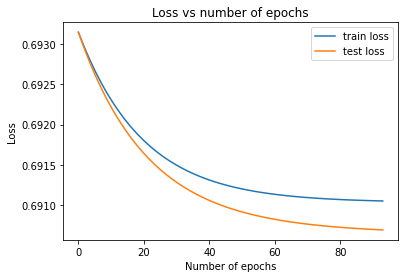

The final test error is 46.34%


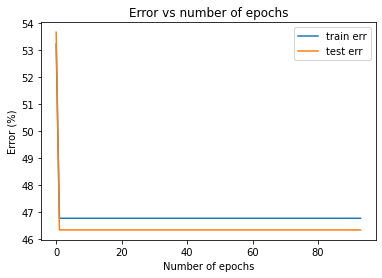

In [34]:
# Calculate sigmoid of value
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Predict output given input and weights
def predict(x, w, w_0):
    z = np.matmul(w, x.T) + w_0
    return sigmoid(z)

# Determine classifications based on output of predict function
def classify(x):
    x[x > 0.5] = 1
    x[x <= 0.5] = 0
    return x

# Determine log loss value, given actual output and calculated output
def calc_log_loss(y, y_new):
    return -(y*np.log(y_new)+(1-y)*np.log(1-y_new)).mean()

# Determine gradient of loss wrt w
def calc_grad_w(x, y, y_new):
    return (np.reshape(y_new-y,(len(x) ,1))*x).mean(axis = 0)

# Determine gradient of loss wrt w_0
def calc_grad_w_0(y, y_new):
    return (y_new-y).mean(axis = 0)

# Perform logarithmic regression
def log_reg(x_train, y_train, x_test, y_test, learning_rate, n_iter):
    train_losses = []
    test_losses = []
    train_errs = []
    test_errs = []
    w = np.zeros(x_train.shape[1])  #an array of weights for each x variables
    w_0 = 0
    for i in range(n_iter):
        # Determine predictions based on current weights
        res_train = predict(x_train,w,w_0)
        res_test = predict(x_test,w,w_0)

        # Calculate training and test loss at each epoch and store it 
        train_loss = calc_log_loss(y_train,res_train)
        train_losses.append(train_loss)

        test_loss = calc_log_loss(y_test,res_test)
        test_losses.append(test_loss)

        # Calculate gradients
        grad_w = calc_grad_w(x_train,y_train,res_train)
        grad_w_0 = calc_grad_w_0(y_train,res_train)

        # Update values
        w = w - learning_rate * grad_w
        w_0 = w_0 - learning_rate * grad_w_0

        # Determine classifications based on current weights
        class_train = classify(res_train)
        class_test = classify(res_test)

        # Determine and store accuracies
        train_err = 100 * np.mean(y_train != class_train)
        train_errs.append(train_err)
        test_err = 100 * np.mean(y_test != class_test)
        test_errs.append(test_err)

        # Break from loop if losses converge
        if len(train_losses) > 1 and np.abs(train_losses[i-1] - train_losses[i]) < 10e-7:
            print(f"Tolerance reached at epoch {i}")
            num_epochs = i
            break
    
    # Plot test and training losses vs the number of epochs
    plt.plot(train_losses)
    plt.plot(test_losses)
    plt.legend(['train loss', 'test loss'])
    plt.title("Loss vs number of epochs")
    plt.ylabel("Loss")
    plt.xlabel("Number of epochs")
    plt.show()

    # Plot test and training errors vs the number of epochs
    plt.figure()
    plt.plot(train_errs)
    plt.plot(test_errs)
    plt.legend(['train err', 'test err'])
    plt.title("Error vs number of epochs")
    plt.ylabel("Error (%)")
    plt.xlabel("Number of epochs")

    # Output the final test error
    print(f"The final test error is {test_errs[-1]:.2f}%")
    return [w, w_0]

weight = log_reg(X_train,Y_train, X_test, Y_test, 0.1, 100)


## Part 3

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Minimum Euclidean Distance (MED) Classifier
med = LinearDiscriminantAnalysis()
med.fit(X_train, Y_train)
med_pred = med.predict(X_test)

# Generalized Euclidean Distance (GED) Classifier
ged = QuadraticDiscriminantAnalysis()
ged.fit(X_train, Y_train)
ged_pred = ged.predict(X_test)

# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)

# Evaluate and compare the models
models = ["MED", "GED", "kNN", "Logistic Regression"]
predictions = [med_pred, ged_pred, knn_pred, lr_pred]

for model, pred in zip(models, predictions):
    accuracy = accuracy_score(Y_test, pred)
    error = 1-accuracy
    print(f"\n{model} Classifier:")
    print(f"Error: {error:.4f}")


MED Classifier:
Error: 0.4634

GED Classifier:
Error: 0.4634

kNN Classifier:
Error: 0.5220

Logistic Regression Classifier:
Error: 0.4634
